In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data



# Load MNIST data
data = load_data()

(X_train, y_train), (X_test, y_test) = data

X_train = X_train.reshape((X_train.shape[0], 28*28))/255.0
X_test = X_test.reshape((X_test.shape[0], 28*28))/255.0

# Convert labels to one-hot encoding
n_classes = 10
y_onehot = np.zeros((y_train.shape[0], n_classes))
y_onehot[np.arange(y_train.shape[0]), y_train] = 1

In [122]:
# Batch size
batch_size = 32

# Number of batches
num_batches = len(X_train) // batch_size

# Define neural network architecture
input_size = X_train.shape[1]
hidden_size = 200
output_size = n_classes
learning_rate = 0.1
epochs = 25

# Initialize weights and biases
# np.random.seed(0)
# W1 = np.random.randn(input_size, hidden_size)
# W2 = np.random.randn(hidden_size, output_size)

# Q4-4 Try different weight initialization: zero
# W1 = np.zeros((input_size, hidden_size))
# W2 = np.zeros((hidden_size, output_size))

# Q4-4 Try different weight initialization: rand [-1,1]
W1 = np.random.uniform(low=-1, high=1, size=(input_size, hidden_size))
W2 = np.random.uniform(low=-1, high=1, size=(hidden_size, output_size))



# Training loop with batches
losses = []
for epoch in range(epochs):
    for i in range(num_batches):
        # Get batch data
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch_X = X_train[start_idx:end_idx]
        batch_y = y_onehot[start_idx:end_idx]

        # Forward pass
        z1 = batch_X.dot(W1)
        a1 = 1 / (1 + np.exp(-z1))
        z2 = a1.dot(W2)
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Compute loss
        log_probs = -np.log(probs[range(len(batch_y)), np.argmax(batch_y, axis=1)])
        loss = np.mean(log_probs)
        losses.append(loss)

        # Backpropagation
        delta3 = probs - batch_y
        dW2 = a1.T.dot(delta3)
        delta2 = delta3.dot(W2.T) * a1 * (1 - a1)
        dW1 = batch_X.T.dot(delta2)

        # Update weights and biases
        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2

In [123]:
# Test the model
z1 = X_test.dot(W1)
a1 = 1 / (1 + np.exp(-z1))
z2 = a1.dot(W2)
exp_scores = np.exp(z2)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
predictions = np.argmax(probs, axis=1)
accuracy = accuracy_score(y_test, predictions)

# Print test accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 97.16%


In [126]:
# average loss over batch

avg_loss = []
for epoch in range(epochs):
    avg_loss.append(np.mean(losses[epoch*num_batches: (epoch+1)*num_batches]))

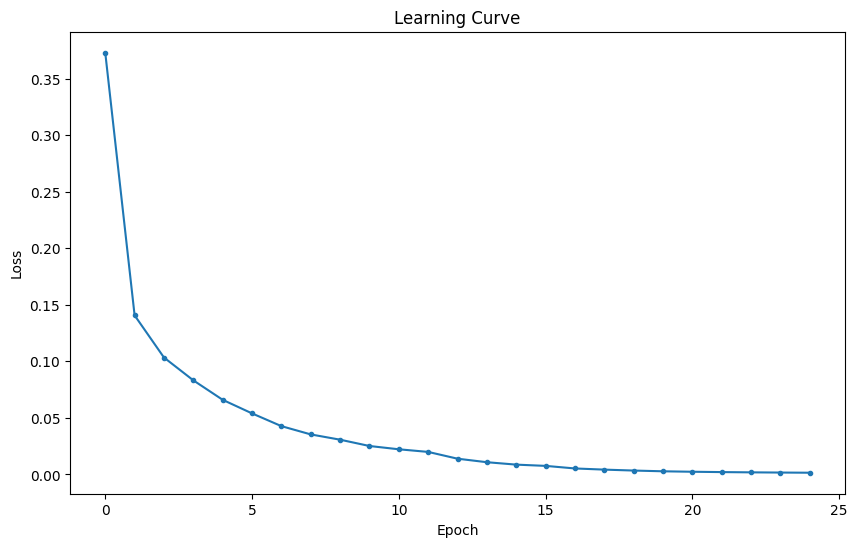

In [127]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(avg_loss, marker='.')
plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [92]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split



y_onehot = torch.tensor(y_onehot)
X_train = torch.tensor(X_train.astype('float32'))
X_test = torch.tensor(X_test.astype('float32'))
# Create DataLoader for batches
train_dataset = TensorDataset(X_train, y_onehot)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# Define neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 200
output_size = 10
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 25
losses = []
for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(batch_X)
        # Compute loss
        loss = criterion(outputs, torch.argmax(batch_y, dim=1))
        # Backward pass
        loss.backward()
        # Update weights
        optimizer.step()
        # Save loss for plotting
        losses.append(loss.item())


In [95]:
# Test the model
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy_score(y_test, predicted)

# Print test accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 97.20%


In [96]:
# average loss over batch

avg_loss = []
for epoch in range(epochs):
    avg_loss.append(np.mean(losses[epoch*num_batches: (epoch+1)*num_batches]))

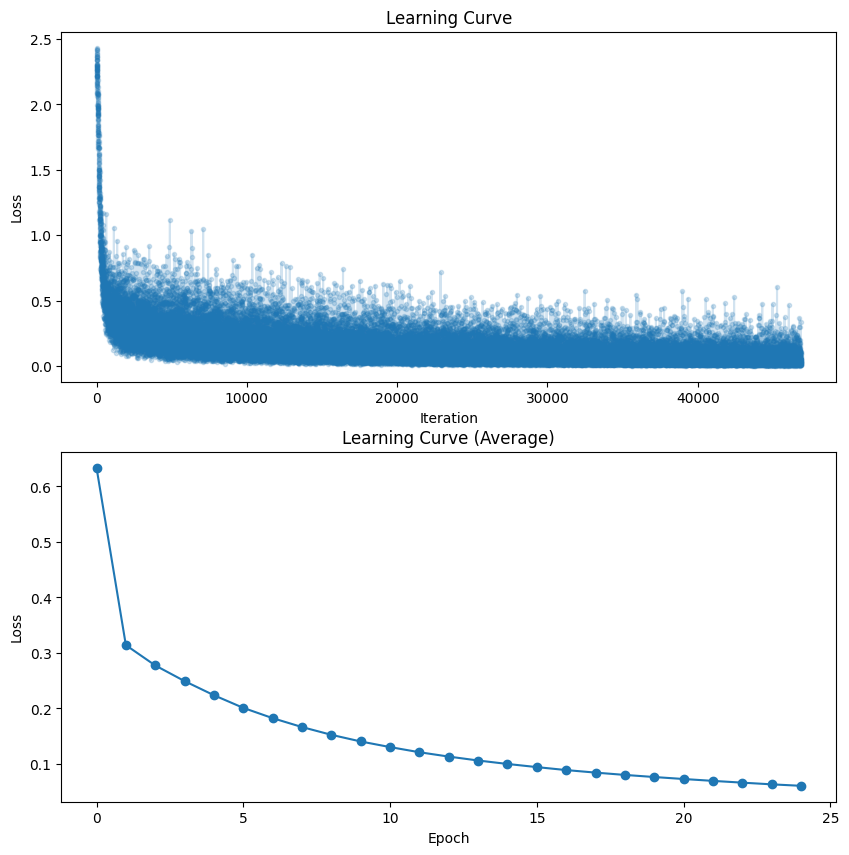

In [109]:
# Plot the learning curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(losses, marker='.', alpha=0.2)
plt.title("Learning Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
plt.plot(avg_loss, marker='o')
plt.title("Learning Curve (Average)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
